In [27]:
import pandas as pd

data = pd.read_csv('full_data_for_models.csv')
data.head()

,Crash Date/Time,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,1,1,3,1,1,0,0,10.48,2,2,13


In [28]:
data.drop(columns=['Crash Date/Time'], inplace=True)
data.head()

,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,35,1,1,3,0,1,0,0,14.88,2,0,7
1,35,1,1,3,0,1,0,0,14.88,2,0,22
2,40,1,1,3,1,1,0,0,1.64,2,0,8
3,40,1,1,3,1,1,0,0,1.64,2,0,5
4,40,1,1,3,1,1,0,0,10.48,2,2,13


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Speed Limit      172105 non-null  int64  
 1   Crash Quarter    172105 non-null  int64  
 2   Crash Month      172105 non-null  int64  
 3   Crash DayOfWeek  172105 non-null  int64  
 4   Crash Hour       172105 non-null  int64  
 5   Is Holiday       172105 non-null  int64  
 6   Is Peak Hour     172105 non-null  int64  
 7   Is Weekend       172105 non-null  int64  
 8   Distance         172105 non-null  float64
 9   Total Vehicles   172105 non-null  int64  
 10  Injury_Target    172105 non-null  int64  
 11  Vehicle Age      172105 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 15.8 MB


# Split the Data

In [30]:
data['Crash Hour'].value_counts()

17    13879
16    13429
15    13109
18    11984
14    10763
8     10509
13    10007
12     9823
9      9327
11     8533
19     8532
7      8335
10     7832
20     6353
21     5763
6      4437
22     4337
23     3307
0      2526
5      2416
1      2060
2      1763
3      1639
4      1442
Name: Crash Hour, dtype: int64

# Standardize Time - Retain cyclical nature

In [31]:
import numpy as np

data['quarter_sin'] = np.sin(2 * np.pi * data['Crash Quarter'] / 4)
data['quarter_cos'] = np.cos(2 * np.pi * data['Crash Quarter'] / 4)

data['month_sin'] = np.sin(2 * np.pi * data['Crash Month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['Crash Month'] / 12)

data['DayOfWeek_sin'] = np.sin(2 * np.pi * data['Crash DayOfWeek'] / 7)
data['DayOfWeek_cos'] = np.cos(2 * np.pi * data['Crash DayOfWeek'] / 7)

data['hour_sin'] = np.sin(2 * np.pi * data['Crash Hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['Crash Hour'] / 24)

data.drop(columns=['Crash Quarter', 'Crash Month', 'Crash DayOfWeek', 'Crash Hour'], inplace=True)

In [32]:
data.head()

,Speed Limit,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age,quarter_sin,quarter_cos,month_sin,month_cos,DayOfWeek_sin,DayOfWeek_cos,hour_sin,hour_cos
0,35,1,0,0,14.88,2,0,7,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.000000,1.000000
1,35,1,0,0,14.88,2,0,22,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.000000,1.000000
2,40,1,0,0,1.64,2,0,8,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.258819,0.965926
3,40,1,0,0,1.64,2,0,5,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.258819,0.965926
4,40,1,0,0,10.48,2,2,13,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.258819,0.965926


In [33]:
from sklearn.model_selection import train_test_split

X = data.drop('Injury_Target', axis=1)
y = data['Injury_Target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Continuous Values

In [34]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['Speed Limit', 'Distance', 'Vehicle Age', 'Total Vehicles']

scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

In [35]:
X.head()

,Speed Limit,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Vehicle Age,quarter_sin,quarter_cos,month_sin,month_cos,DayOfWeek_sin,DayOfWeek_cos,hour_sin,hour_cos
0,0.221542,1,0,0,0.511152,-0.014673,-0.163036,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.000000,1.000000
1,0.221542,1,0,0,0.511152,-0.014673,2.402364,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.000000,1.000000
2,0.673624,1,0,0,-1.752351,-0.014673,0.007991,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.258819,0.965926
3,0.673624,1,0,0,-1.752351,-0.014673,-0.505089,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.258819,0.965926
4,0.673624,1,0,0,-0.241070,-0.014673,0.863124,1.0,6.123234e-17,0.5,0.866025,0.433884,-0.900969,0.258819,0.965926


In [36]:
data['Injury_Target'].value_counts() 

0    141185
1     17482
2     11870
3      1415
4       153
Name: Injury_Target, dtype: int64

# Dealing with Class Imbalance - set to Class 2

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

desired_samples = 11870

smote = SMOTE(sampling_strategy={3: desired_samples, 4: desired_samples})
under_sampler = RandomUnderSampler(sampling_strategy={0: desired_samples, 1: desired_samples})

pipeline = Pipeline(steps=[
    ('over', smote),
    ('under', under_sampler)
])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Print the class distribution of the resampled training set
print("Training set class distribution:")
print(Counter(y_train_resampled))

# Print the class distribution of the test set
print("Test set class distribution:")
print(Counter(y_test))

Training set class distribution:
Counter({0: 11870, 1: 11870, 3: 11870, 4: 11870, 2: 9506})
Test set class distribution:
Counter({0: 28214, 1: 3553, 2: 2364, 3: 254, 4: 36})


# Train and Test the RF Model

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.43395020481682695
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.45      0.59     28214
           1       0.13      0.43      0.20      3553
           2       0.10      0.29      0.15      2364
           3       0.05      0.07      0.06       254
           4       0.08      0.06      0.07        36

    accuracy                           0.43     34421
   macro avg       0.24      0.26      0.21     34421
weighted avg       0.72      0.43      0.51     34421



In [47]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[12691  9607  5654   248    14]
 [ 1241  1532   738    37     5]
 [  822   802   695    42     3]
 [   79    90    67    17     1]
 [   10     9    13     2     2]]


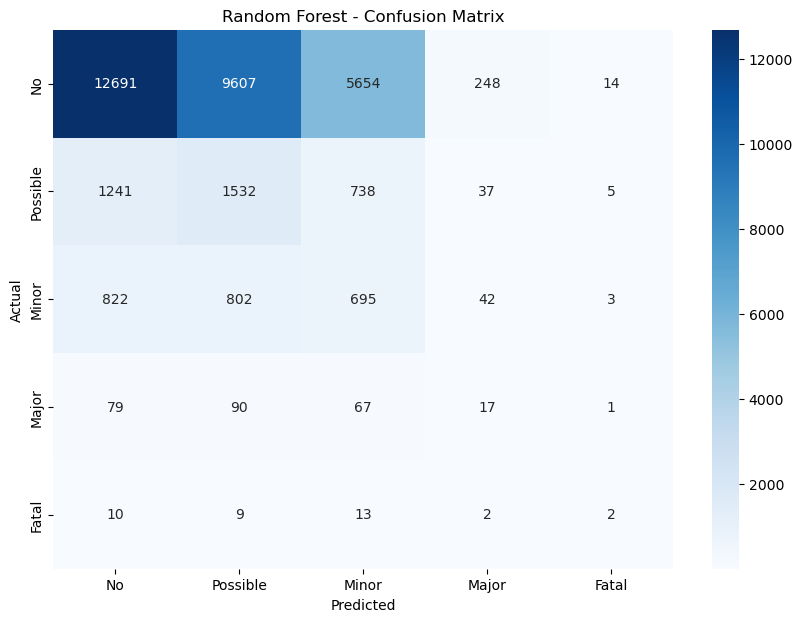

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'], yticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

ROC AUC Score (One-vs-Rest): 0.58
ROC AUC Score (One-vs-One): 0.58


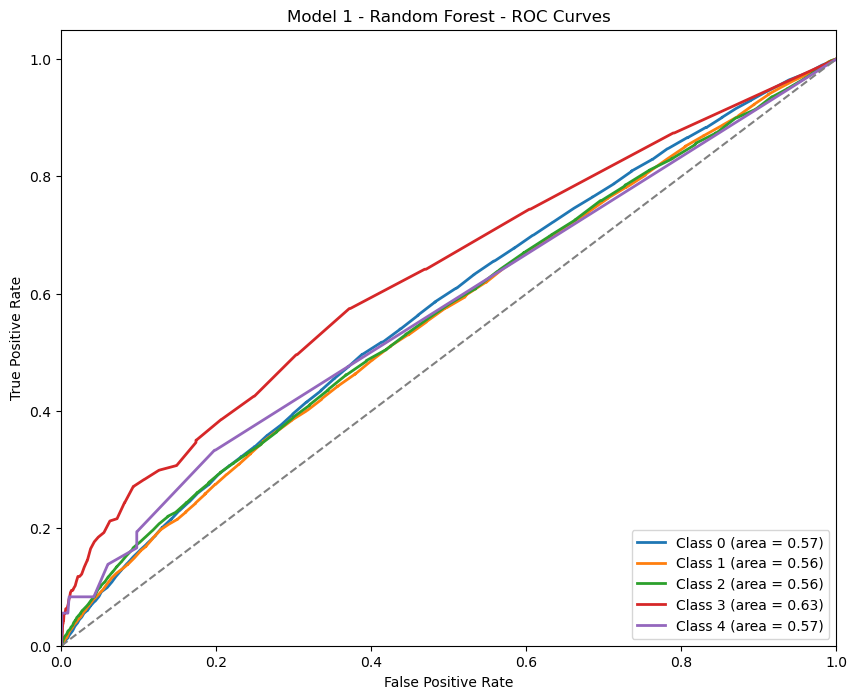

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

y_prob = model.predict_proba(X_test)

# Calculate the ROC AUC score with multi_class parameter
roc_auc_ovr = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr')
roc_auc_ovo = roc_auc_score(y_test_binarized, y_prob, multi_class='ovo')
print(f'ROC AUC Score (One-vs-Rest): {roc_auc_ovr:.2f}')
print(f'ROC AUC Score (One-vs-One): {roc_auc_ovo:.2f}')

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 1 - Random Forest - ROC Curves')
plt.legend(loc="lower right")
plt.show()